# Predicting Corporación Favorita sales through varieties of condition


Goals:


Forecast store sales by building model to predicts unit sales for each items sold at different stores



# 1. Import libraries

In [2]:
#importing packages
#basics
import numpy as np
import pandas as pd
import os
import gc
import warnings

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 2. Data exploration

In [3]:
train = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\test.csv")
stores = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\stores.csv")
transactions = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\transactions.csv")
oil = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\oil.csv")
holiday = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\holidays_events.csv")

In [4]:
print("Train dataframe")
print(train.head())
print("\nTest dataframe")
print(test.head())
print("\nStores dataframe")
print(stores.head())
print("\nTransactions dataframe")
print(transactions.head())
print("\nOil dataframe")
print(oil.head())
print("\nHolidays and events dataframe")
print(holiday.head())

Train dataframe
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Test dataframe
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Stores dataframe
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2       

In [27]:
print("Train dataframe")
print(train.info())
print("\nTest dataframe")
print(test.info())
print("\nStores dataframe")
print(stores.info())
print("\nTransactions dataframe")
print(transactions.info())
print("\nOil dataframe")
print(oil.info())
print("\nHolidays and events dataframe")
print(holiday.info())

Train dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Test dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

Stores dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Colu

In [5]:
#concat the train and test dataframe
df = pd.concat([test,train])
#check null value in each column
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
sales          28512
dtype: int64

# 3. Data visualisation

In [6]:
# change the datetime type for df
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['year']=pd.to_datetime(df['date']).dt.year

df['day_of_week'] = df['date'].dt.dayofweek
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

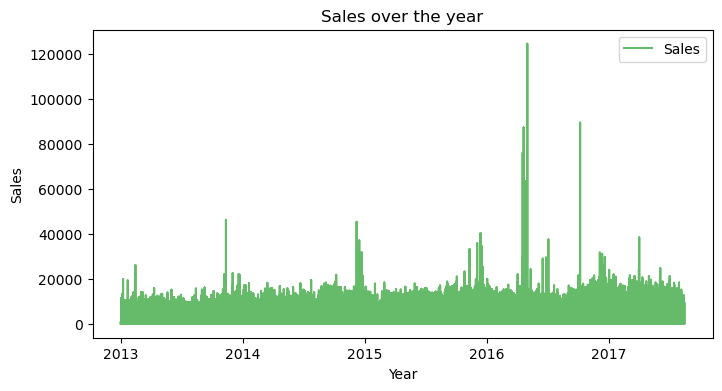

In [29]:
# Data Visualization on sales
plt.figure(figsize=(8, 4))
plt.plot(df['date'], df['sales'],label='Sales',color='#66BB6A')
plt.title('Sales over the year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

TypeError: 'method' object is not subscriptable

<Figure size 800x400 with 0 Axes>

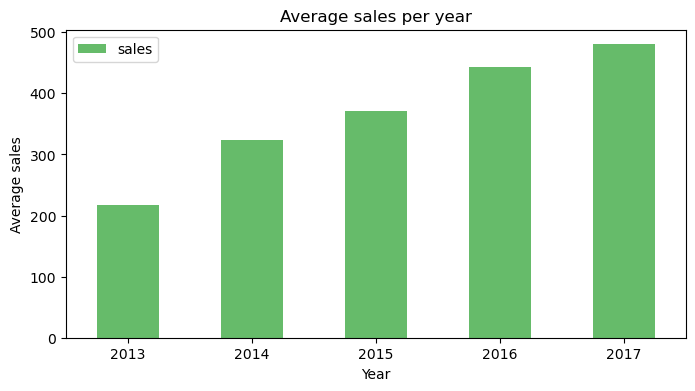

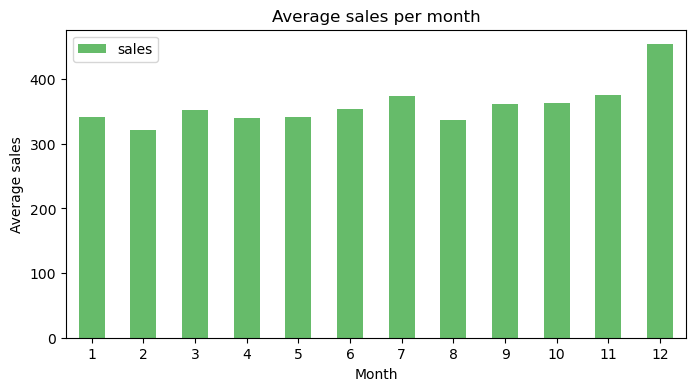

In [25]:
# Visualize average sales per year
plt.figure(figsize=(8,4))
df.groupby('year')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales per year')
plt.xlabel('Year')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Visualize average sales per month
plt.figure(figsize=(8,4))
df.groupby('month')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales per month')
plt.xlabel('Month')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

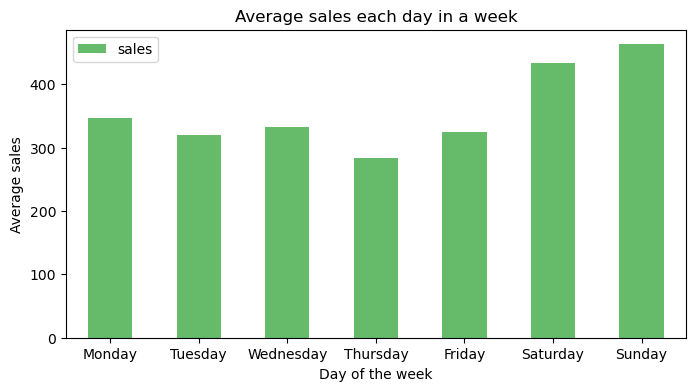

In [24]:
# average sales in each day
plt.figure(figsize=(8,4))
df.groupby('day_of_week')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales each day in a week')
plt.xlabel('Day of the week')
plt.ylabel('Average sales')
plt.xticks([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=0)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

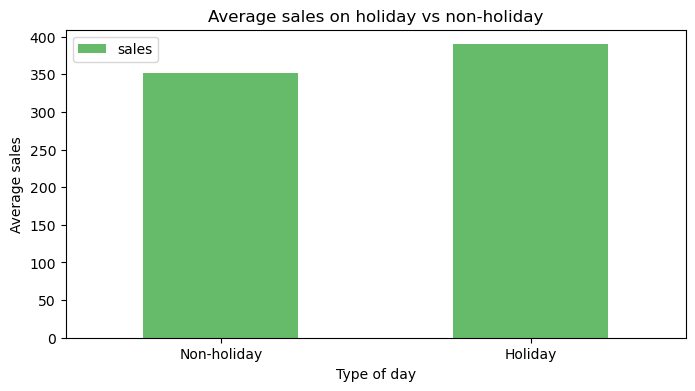

In [21]:
# Difference between average sales on holiday vs non-holiday
# create a column for sales on holiday
df['is_holiday']= df['date'].isin(holiday['date'])
# visualization
plt.figure(figsize=(8,4))
df.groupby('is_holiday')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales on holiday vs non-holiday')
plt.xlabel('Type of day')
plt.ylabel('Average sales')
plt.xticks([0,1], ['Non-holiday','Holiday'], rotation=0)
plt.legend()
plt.show


In [13]:
# create new column named 'city' in df
df_city = pd.merge(df,stores[['store_nbr','city']], on='store_nbr', how='left')

<function matplotlib.pyplot.show(close=None, block=None)>

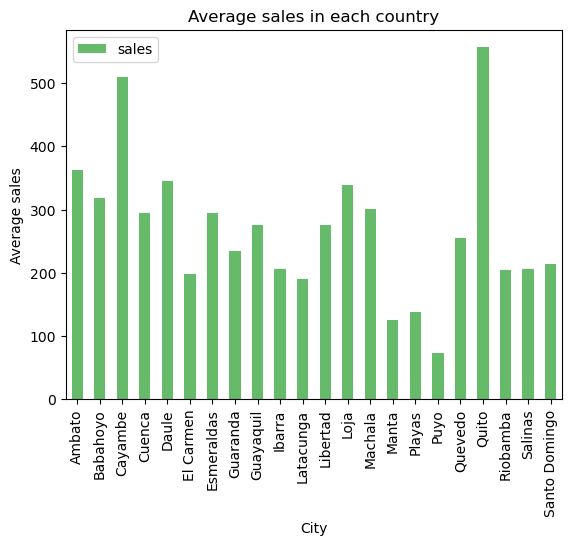

In [22]:
# average sales each city
df_city.groupby('city')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales in each country')
plt.xlabel('City')
plt.ylabel('Average sales')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

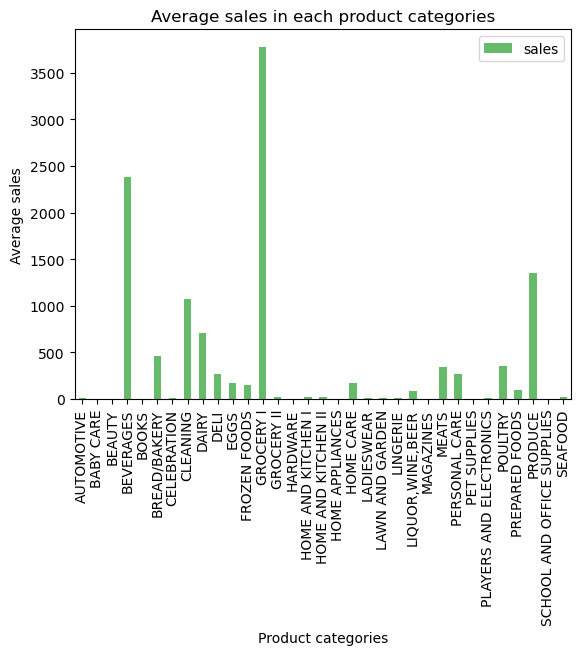

In [23]:
# average sales each category of products
df.groupby('family')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales in each product categories')
plt.xlabel('Product categories')
plt.ylabel('Average sales')
plt.legend()
plt.show

In [ ]:
# let's see how oil prices affect the sales
df_oil = pd.merge(train, oil, on='date', how='left')
oil_sales = df_oil.groupby('date')['sales'].sum().reset_index()


# 4. Execute using PostgreSQL 

In [11]:
# import postgresql package
import psycopg2 as pg2
# connect VSCode to postgresql database
conn = pg2.connect(database='store_sales', user='postgres',password='12345678')
cur = conn.cursor()

In [12]:
query1 = '''
        CREATE TABLE new_table (
            userid integer
            , tmstmp timestamp
            , type varchar(10)
        )
        ;
        '''